In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#The class plot_diagram helps us to visualize the data space and the parameter space during training and has nothing to do with PyTorch.
# The class for plotting

class plot_diagram():
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
        
    # Destructor
    def __del__(self):
        plt.close('all')

we will be creating our own data using our own parameters, this will help us to check our prameters

torch.arange(start=0, end, step=1, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
Returns a 1-D tensor of size $ \frac{\text{end} - \text{start}}{\text{step}}$ with values from the interval [start, end) taken with common difference step beginning from start.

Note that non-integer step is subject to floating point rounding errors when comparing against end; to avoid inconsistency, we advise adding a small epsilon to end in such cases.

$\text{out}_{{i+1}} = \text{out}_{i} + \text{step}$


.view()- reshapes the tensor to the desired dimension

-1 is used if we don't know the exact value

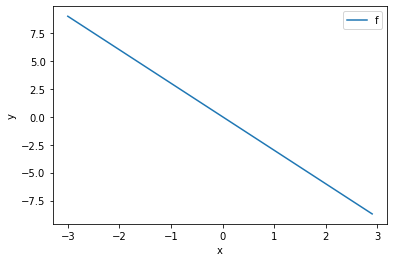

In [31]:
# Create the f(X) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

# Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


#print(X.size())

Let us add some noise to the data in order to simulate the real data. Use <code>torch.randn(X.size())</code> to generate Gaussian noise that is the same size as <code>X</code> and has a standard deviation opf 0.1.

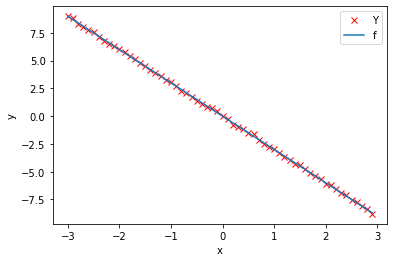

In [32]:
# Add some noise to f(X) and save it in Y
Y = f + 0.1 * torch.randn(X.size())

# Plot the data points
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<h2 id="Model_Cost">Create the Model and Cost Function (Total Loss)</h2>
In this section, let us create the model and the cost function (total loss) we are going to use to train the model and evaluate the result.

First, define the <code>forward</code> function $y=w*x$. (We will add the bias in the next lab.)

In [33]:
# Create forward function for prediction
def forward(x):
    return w * x

# Create the MSE(mean square error)(cost function) function for evaluate the result.
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)    

In [34]:
# Create Learning Rate and an empty list to record the loss for each iteration
lr = 0.1
LOSS = []

w = torch.tensor(-10.0, requires_grad = True)

#Create a plot_diagram object to visualize the data space and the parameter space for each iteration during training:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

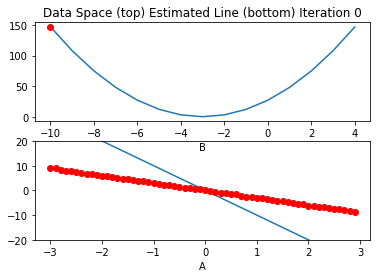

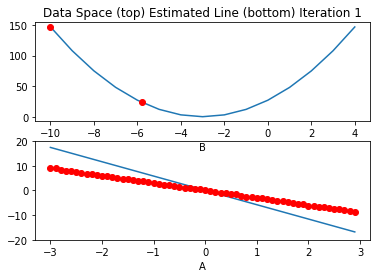

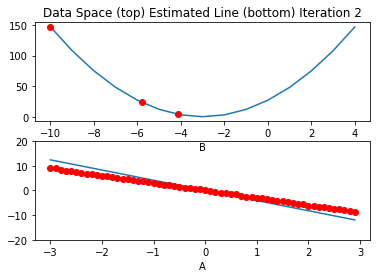

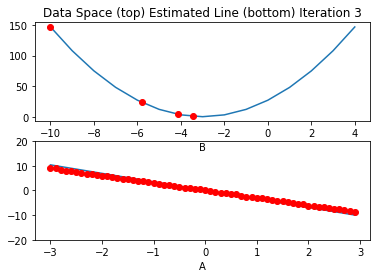

<Figure size 432x288 with 0 Axes>

In [35]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data      #we use .data to get access to the data stored in the tensor
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

# Give 4 iterations for training the model here.

train_model(4)

Text(24.0, 0.5, 'Cost')

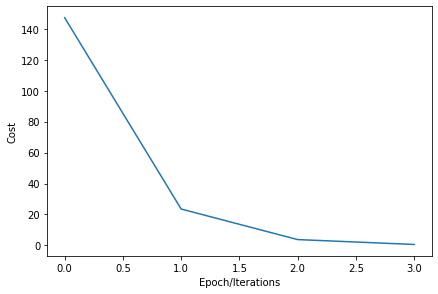

In [36]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

<h1>Linear regression 1D: Training Two Parameter</h1>

In [37]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [38]:
# The class for plot the diagram
#The class plot_error_surfacesis just to help you visualize the data space and the parameter space during training and has nothing to do with PyTorch. 

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

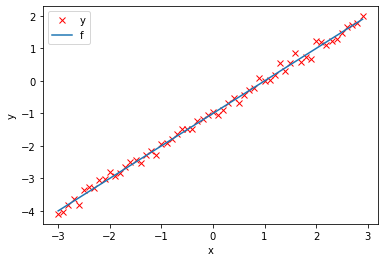

In [39]:
# Create f(X) with a slope of 1 and a bias of -1
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1

# Add noise
Y = f + 0.1 * torch.randn(X.size())

# Plot out the line and the points with noise

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

<Figure size 432x288 with 0 Axes>

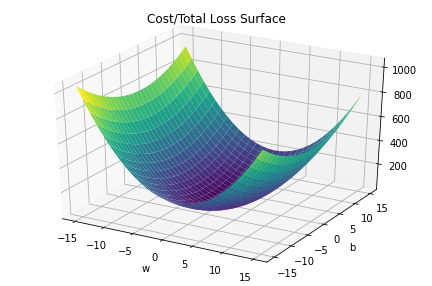

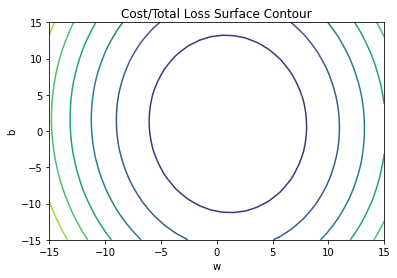

In [40]:
# Define the forward function

def forward(x):
    return w * x + b

# Define the MSE Loss function

def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 15, X, Y, 30)


# Define the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

# Define learning rate and create an empty list for containing the loss for each iteration.

lr = 0.1
LOSS = []

In [41]:
# The function for training the model

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
            
        # store the loss in the list LOSS
        LOSS.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

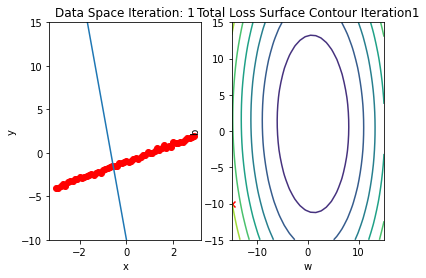

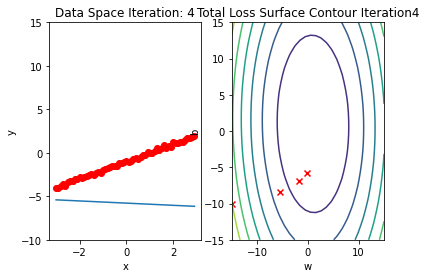

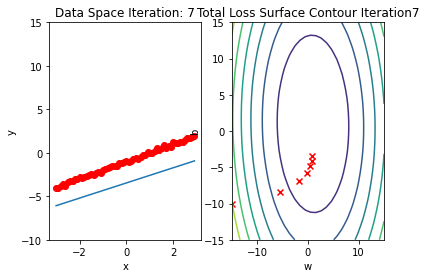

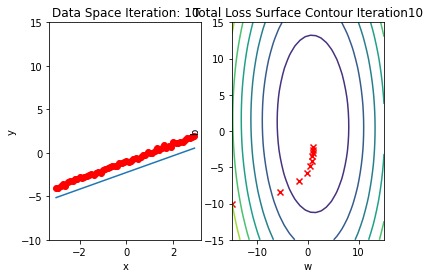

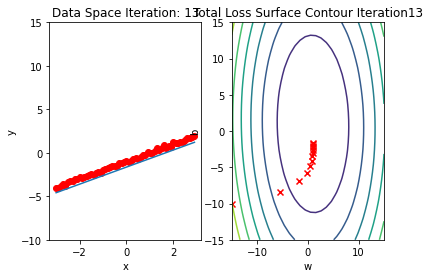

In [42]:
# Train the model with 15 iterations

train_model(15)

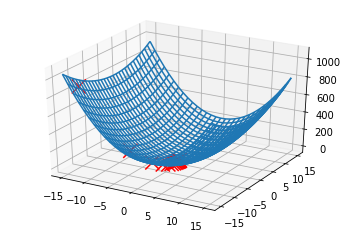

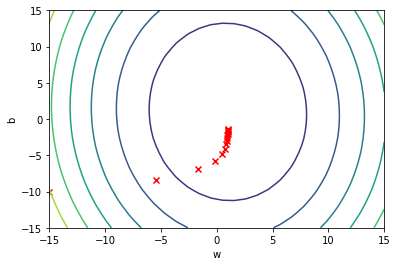

Text(24.125, 0.5, 'Cost')

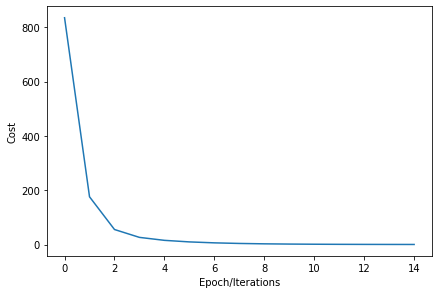

In [43]:
# Plot out the Loss Result

get_surface.final_plot()
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")